# Frequent Itemssets
### Adam Gibbs
##### 12 April 2021

This jupyter notebook includes the report for my Apriori MapReduce frequent Itemsets homework and first includes a graph of runtime vs corr_factor and then a graph of ouput lengths vs corr_factor.

<b><u>UPDATE:</u></b> This is my second submission of the assignment. I realized my output was slightly wrong as I was getting outputs greater than 313 for the smaller correction factors. This occured because I stored my itemsets read in from the cached part-r-00000 output file from Mapper1 in a LinkedList and not a LinkedHashSet so I had duplicates which meant the duplicate itemsets had double (or more) of their actual support and I reported some false positives. Initially I though this was because high corr_factor resulted in some false negatives but then I noticed some itemsets had support greater than the dataset size.  

In [5]:
# IMPORTS
import matplotlib.pyplot as plt

In [6]:
# Results from runs

corr_factor = [1,0.975,0.95,0.9,0.85]
interm_len = [484, 645, 826, 1531, 2761]
output_len = [313, 313, 313,313,313]
runtimes = [73978, 97034, 131011, 276961, 643350]

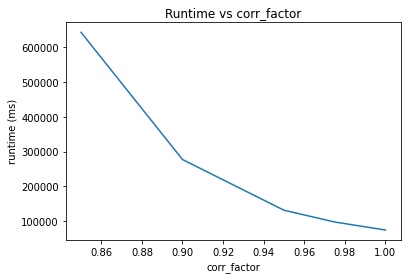

In [7]:
# RUNTIME GRAPH
# plot the two lines with different styles (colors automatic)
# label each line for legend
plt.plot(corr_factor, runtimes)
# give plot a title and label each axis
plt.xlabel("corr_factor")
plt.ylabel("runtime (ms)")
plt.title("Runtime vs corr_factor")
# show the plot
plt.show()



### Comments on Runtime Plot
The graph shows that the runtime decreases as the correction factor parameter increases. This makes sense as a lower corr_factor lowers the threshold in the first Mapping round for a candidate to be considered in the second round map function. This means for each itemset size, more candidates are generated and pruned, and we have to calculate the support for more candidates. This also means more itemsets are passed to the second round mapper which has to calculate the support of more itemsets. Further, a lower threshold means more large itemsets will be generated and those are the most costly itemsets to find the support of, so we see the runtime increase nonlinearly as corr_factor decreases. Also, as we saw with frequent itemsets, there are more low support items than high support items so a lower threshold means a greater-than-linearly increasing number of itemsets to consider. For these reasons we see the runtime increase as the corr_factor decreases. 

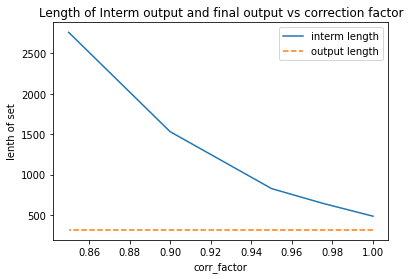

In [8]:
# INTERM/OUTPUT LENGTH GRAPH
# plot the two lines with different styles (colors automatic)
# label each line for legend
plt.plot(corr_factor, interm_len, label="interm length", linestyle="-")
plt.plot(corr_factor, output_len, label="output length", linestyle="--")
# give plot a title and label each axis
plt.title("Length of Interm output and final output vs correction factor")
plt.xlabel("corr_factor")
plt.ylabel("lenth of set")
# show legend and then plot
plt.legend()
plt.show()

### Comments on length of output graph
This graph depicts the length of the intermediate output vs corr_factor, shown in solid blue, and the length of the final output vs corr_factor, shown in dashed orange. We see the interm length increase at a rate greater than linear as the corr_factor decreases. As we discussed above, this is because the threshold to be included decreases and more itemsets are considered candidates. Also as we stated above, there are more itemsets of low frequency so as we decrease corr_factor we see many more itemsets and that is why the increase is more than linear. The final output, however, doesn't change as the corr_factor changes because of the way the SONMR algorithm works. 

The SONMR algorithm uses the fact that if an itemset is frequent in the dataset it is frequent in at least one chunk of the transactions. Since the corr_factor simply lowers the threshold for being frequent in a single chunk. This corr_factor would perhaps allow for an approximation algoirithm to run through a subset of chunks and generate candidates, but when the first round mappers run through every chunk of the dataset the support threshold for each chunk does not need to be lowered to accurately generate all potential candidates for the second round mapper. 

So when running SONMR with my current implementation, the corr_factor is an unecessary parameter that increases the runtime of the algirthm without improving accuracy. 
